In [33]:
!pip install --upgrade xlrd>=2.0.1


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
import xlrd
print("xlrd is installed")

xlrd is installed


In [70]:
df=pd.read_csv('Foreign_Exchange_Rates.csv')

In [71]:
df.head()

,",Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,"
0,"0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805..."
1,"1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,..."
2,"2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856..."
3,"3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1..."
4,"4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,..."


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                         

In [40]:
print(df.isna().sum())

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,    0
dtype: int64


In [44]:
df = df.dropna()


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                         

In [49]:
# Create a business day index (Mon-Fri)
date_index = pd.bdate_range(start="2000-01-03", end="2019-12-31")

In [50]:
# Check if lengths match
if len(df) != len(date_index):
    print(f"Warning: Data rows = {len(df)}, Business days = {len(date_index)}")

In [51]:
# Assign index (truncate or adjust if necessary)
df = df.set_index(date_index[:len(df)])

In [52]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'[^A-Za-z0-9_]', '', regex=True)

In [53]:
# Convert to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values
df = df.ffill().bfill()

df.head()

,Time_SerieAUSTRALIA__AUSTRALIAN_DOLLARUSEURO_AREA__EUROUSNEW_ZEALAND__NEW_ZELAND_DOLLARUSUNITED_KINGDOM__UNITED_KINGDOM_POUNDUSBRAZIL__REALUSCANADA__CANADIAN_DOLLARUSCHINA__YUANUSHONG_KONG__HONG_KONG_DOLLARUSINDIA__INDIAN_RUPEEUSKOREA__WONUSMEXICO__MEXICAN_PESOUSSOUTH_AFRICA__RANDUSSINGAPORE__SINGAPORE_DOLLARUSDENMARK__DANISH_KRONEUSJAPAN__YENUSMALAYSIA__RINGGITUSNORWAY__NORWEGIAN_KRONEUSSWEDEN__KRONAUSSRI_LANKA__SRI_LANKAN_RUPEEUSSWITZERLAND__FRANCUSTAIWAN__NEW_TAIWAN_DOLLARUSTHAILAND__BAHTUS
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,NaN


In [59]:
# 6️⃣ Optional smoothing (7-day rolling average)
df_smooth = df.rolling(window=7, min_periods=1).mean()

In [60]:
# Import the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Scaling for ML models
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_smooth), index=df_smooth.index, columns=df_smooth.columns)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


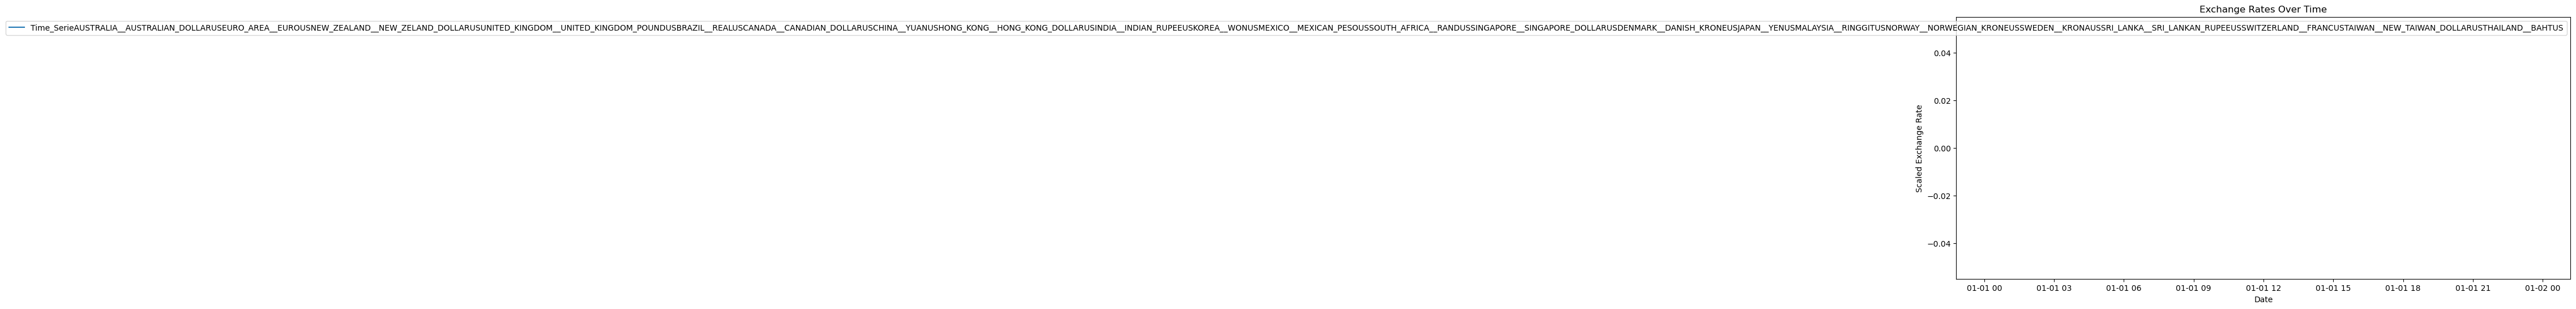

In [61]:
# Plot all exchange rates
plt.figure(figsize=(14,6))
for col in df_scaled.columns:
    plt.plot(df_scaled.index, df_scaled[col], label=col)

plt.title("Exchange Rates Over Time")
plt.xlabel("Date")
plt.ylabel("Scaled Exchange Rate")
plt.legend()
plt.show()


In [64]:
df_scaled[['AUSTRALIAN DOLLAR', 'EURO', 'UNITED KINGDOM POUND']].plot(figsize=(14,6))
plt.title("Selected Exchange Rates Over Time")
plt.show()


KeyError: "None of [Index(['AUSTRALIAN DOLLAR', 'EURO', 'UNITED KINGDOM POUND'], dtype='object')] are in the [columns]"